In [1]:
import numpy as np 
import matplotlib.pylab as plt 
from gaussian_beam_funcs import *

from astropy import units as u

In [2]:
#Gaussian beam paramters d1, d2, t (semi-major (deg), semi-minor (deg), theta(deg))
#theta is a PA measure from y(north) to -x(east). So we add 90°, because the definition of gaussian function
#These values are from image header

beam_parm_deg = np.array([8.548904313809e-6, 6.518279616204e-6, 
                              90+1.545404720306e1])*u.deg #Parameters for Gaussian beam fitted to PSF

beam_parm_rad = (beam_parm_deg).to(u.rad) #Values in rad, requerid for calculation

A_psf = 1     #Amplitude of Gaussian beam fitted to PSF

In [21]:
#Generate xy coordinate grid
scale = 0.005 #[arcsec] from image header
Npix = 23
pix = scale*np.pi/(180*3600) #length of a pixal
fs = 1/pix
max_val = ((Npix-1)*0.05*np.pi/(180*3600))/2
x_vals = np.arange(-11,12)*pix
y_vals = np.arange(-11,12)*pix
X_vals = np.array([x_vals,]*(Npix))
Y_vals = (np.array([y_vals,]*(Npix))).T

In [22]:
X_vals = np.array([x_vals,]*(Npix))
X_vals.shape

(23, 23)

In [23]:
Y_vals.shape

(23, 23)

In [24]:
#Generate beams
B_psf = gauss_beam_ddt(A_psf,beam_parm_rad.value,X_vals,Y_vals)

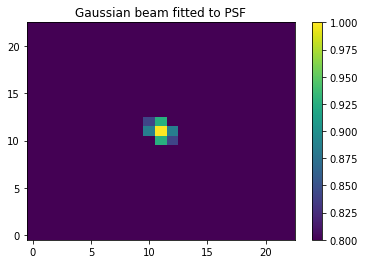

In [25]:
plt.title("Gaussian beam fitted to PSF")
plt.imshow(B_psf,aspect="auto", vmin=0.8, origin="lower")
plt.colorbar()

In [27]:
from astropy.io import fits

fits.writeto(filename="/home/carlos/Desktop/SDP/Dynamics/ALMA/Data/alma_psf.fits", data=B_psf, overwrite=True)